### Forecast Model

1.	Bryn is working with the purchasing team to revise the sales forecast for the year 2018. Based on the information given, create this forecast using your preferred method. If you are not able to create it, explain how would do so.

In [295]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [296]:
df = pd.read_excel("Case Study Data.xlsx")

In [210]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [211]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
#df

In [212]:
df.groupby(['Year'])['Sales'].mean()

Year
2014    242.974159
2015    223.849909
2016    235.487282
2017    221.381418
Name: Sales, dtype: float64

In [218]:
df.Sales.sum()

2297200.8603000003

In [219]:
df.groupby(['Year'])['Sales'].sum()

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

In [220]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
tech = df.loc[df['Category'] == 'Technology']

In [221]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000


In [217]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

## Forecast for All Data

In [147]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [222]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Order Date')
df.isnull().sum()

Order Date    0
Sales         0
Year          0
dtype: int64

In [223]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()

In [150]:
df.Sales.sum()

2297200.8603

In [224]:
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [225]:
data = df['Sales'].resample('MS').mean()

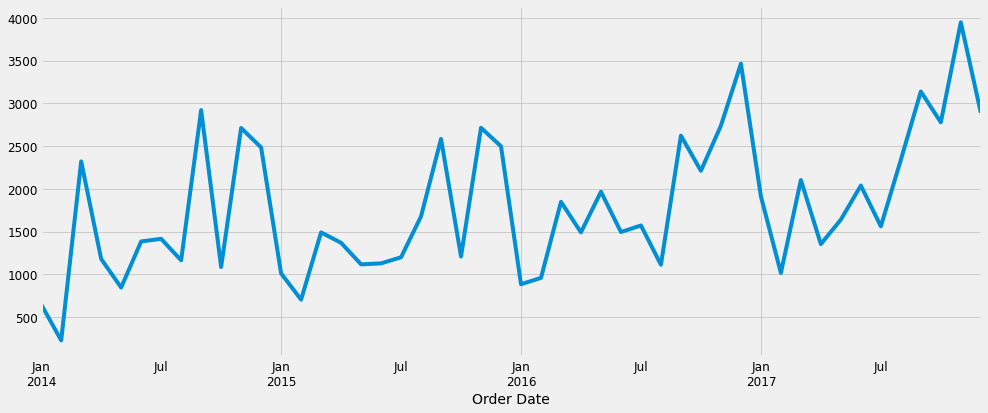

In [226]:
data.plot(figsize=(15, 6))
plt.show()

In [227]:
df.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


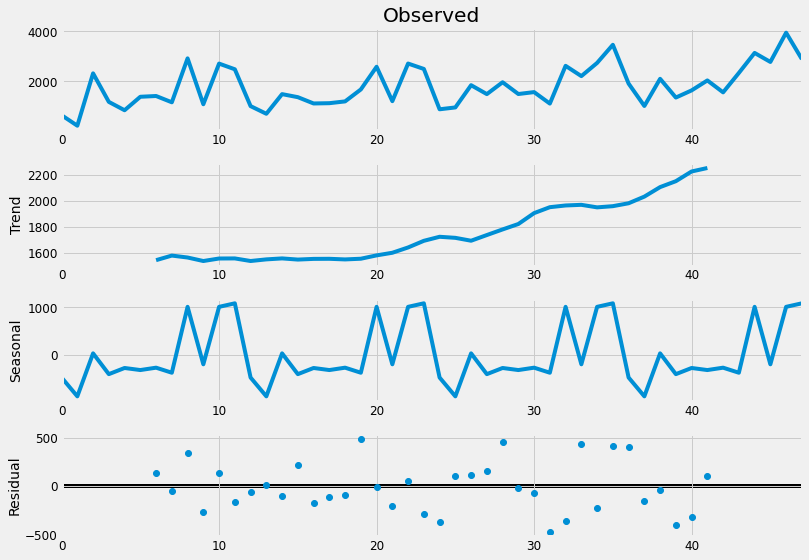

In [228]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = data.values
result = seasonal_decompose(series, model='additive', freq=12)

result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

In [229]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [230]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [247]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1351.5850973687168
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920112
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997936225
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1241.1430140025197
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803022723
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758104
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2741.514784937901
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091517
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673294
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5584110505144
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2458.251575332848
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468714
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255765251166
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1414.221884578159
A

In [268]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0012      0.450     -0.003      0.998      -0.883       0.881
ma.L1         -0.8638      0.273     -3.167      0.002      -1.398      -0.329
ma.S.L12      -1.0439      5.477     -0.191      0.849     -11.778       9.690
sigma2      1.708e+05   9.82e+05      0.174      0.862   -1.75e+06     2.1e+06


In [269]:
results.plot_diagnostics()


ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1296x576 with 0 Axes>

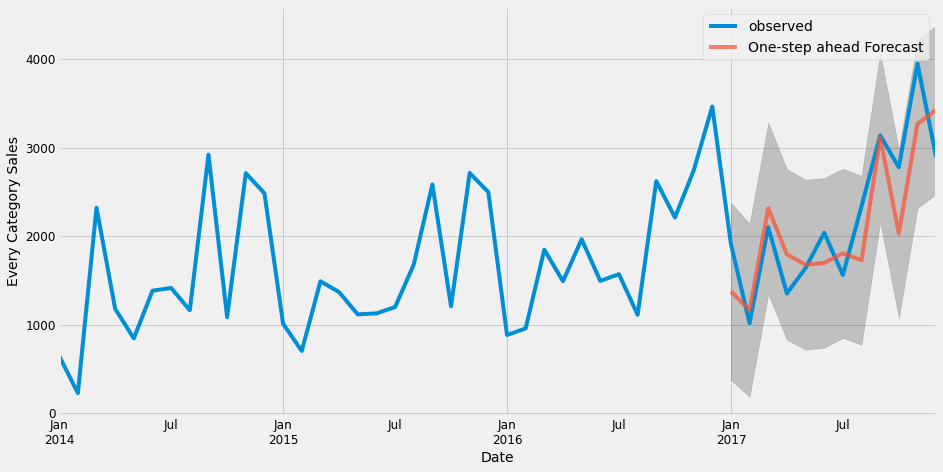

In [282]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Every Category Sales')
plt.legend()
plt.show()

In [290]:
y_forecasted = pred.predicted_mean
y_truth = data['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 200938.5


In [291]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 448.26


In [287]:
data['2017':]

Order Date
2017-01-01    1911.798870
2017-02-01    1015.056670
2017-03-01    2102.584029
2017-04-01    1352.649485
2017-05-01    1639.300378
2017-06-01    2037.758681
2017-07-01    1560.841931
2017-08-01    2337.810667
2017-09-01    3138.094714
2017-10-01    2777.747257
2017-11-01    3948.260833
2017-12-01    2890.666166
Freq: MS, Name: Sales, dtype: float64

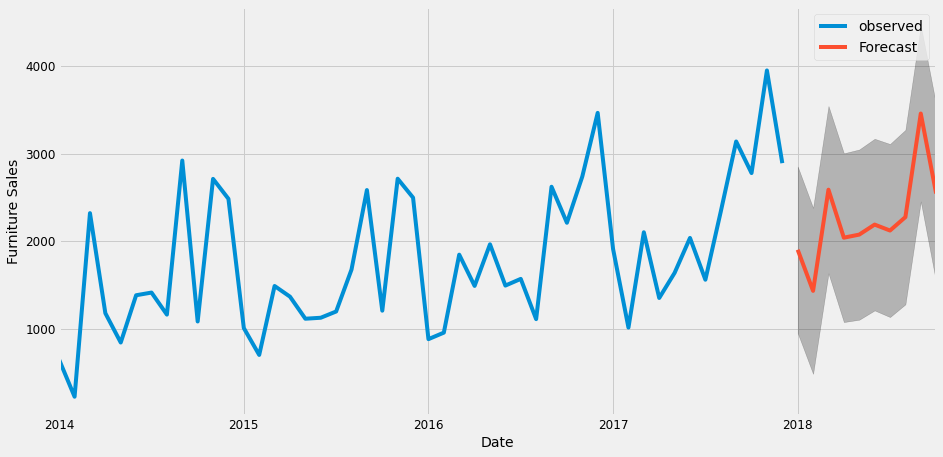

In [286]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [292]:
y_forecasted = pred.predicted_mean
y_truth = data['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 200938.5


In [293]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 448.26


In [289]:
MAPE=np.mean(abs(y_truth-y_forecasted)/y_truth)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')


#### Accuracy of model: 82.53 ####


In [ ]:
MAPE=np.mean(abs(data-forecast)/data)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')


In [274]:
SarimaxModel = model = SARIMAX(data,  
                        order = (1, 1, 1),  
                        seasonal_order =(0, 1, 1, 12))
SalesModel = SarimaxModel.fit()


In [275]:
forecast = SalesModel.predict(start = 0,
                          end = (len(data)) + 12,
                          typ = 'levels').rename('Forecast')
print("Next 12 Month Forecast:",forecast[-12:])

Next 12 Month Forecast: 2018-02-01    1460.479010
2018-03-01    2604.990529
2018-04-01    2058.189365
2018-05-01    2094.218185
2018-06-01    2207.894029
2018-07-01    2143.299990
2018-08-01    2293.092165
2018-09-01    3473.077107
2018-10-01    2560.623417
2018-11-01    3693.971392
2018-12-01    3452.346791
2019-01-01    2094.869470
Freq: MS, Name: Forecast, dtype: float64


<AxesSubplot:title={'center':'Time Series Sales Forecasts'}, xlabel='Order Date'>

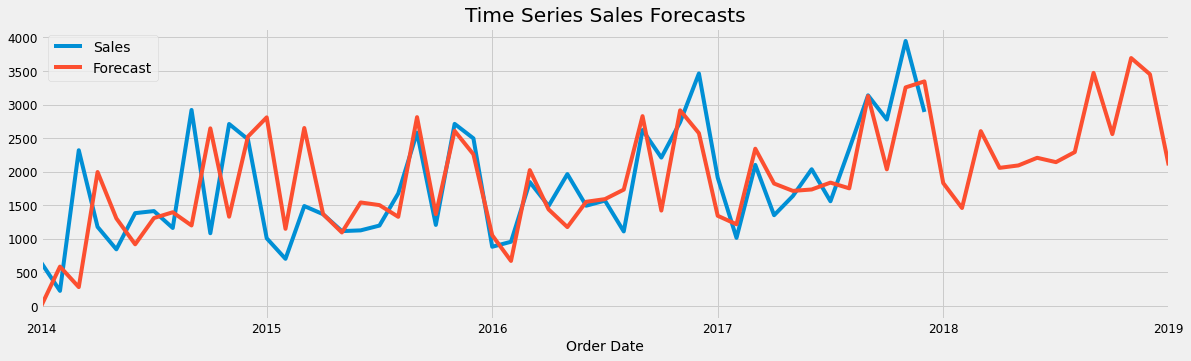

In [276]:
data.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

In [277]:
MAPE=np.mean(abs(data-forecast)/data)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')


#### Accuracy of model: 64.86 ####


### Data Processing

### Furniture

In [297]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
Year          0
dtype: int64

In [298]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [299]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [300]:
y = furniture['Sales'].resample('MS').mean()

### Office

In [301]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office.drop(cols, axis=1, inplace=True)
office = office.sort_values('Order Date')
office.isnull().sum()

Order Date    0
Sales         0
Year          0
dtype: int64

In [302]:
office = office.groupby('Order Date')['Sales'].sum().reset_index()

In [303]:
office = office.set_index('Order Date')
office.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [304]:
x = office['Sales'].resample('MS').mean()

### Tech

In [305]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
tech.drop(cols, axis=1, inplace=True)
tech= tech.sort_values('Order Date')
tech.isnull().sum()

Order Date    0
Sales         0
Year          0
dtype: int64

In [306]:
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()

In [307]:
tech = tech.set_index('Order Date')
tech.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [308]:
z = tech['Sales'].resample('MS').mean()

### Plot 3 categories

In [309]:
y_furniture = furniture['Sales'].resample('MS').mean()
x_office = office['Sales'].resample('MS').mean()
z_tech = tech['Sales'].resample('MS').mean()

In [310]:
y_furniture.head(1)

Order Date
2014-01-01    480.194231
Freq: MS, Name: Sales, dtype: float64

In [311]:
x_office.head(1)

Order Date
2014-01-01    285.357647
Freq: MS, Name: Sales, dtype: float64

In [312]:
z_tech.head(1)

Order Date
2014-01-01    449.041429
Freq: MS, Name: Sales, dtype: float64

In [313]:
furniture = pd.DataFrame({'Order Date':y.index, 'Sales':y.values})
office = pd.DataFrame({'Order Date': x.index, 'Sales': x.values})
tech = pd.DataFrame({'Order Date': z.index, 'Sales': z.values})
sto = furniture.merge(office, how='inner', on='Order Date')
store = sto.merge(tech, how='inner', on='Order Date')
store.head()

,Order Date,Sales_x,Sales_y,Sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588


In [314]:
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales',
                     'Sales':'tech_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales,tech_sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588


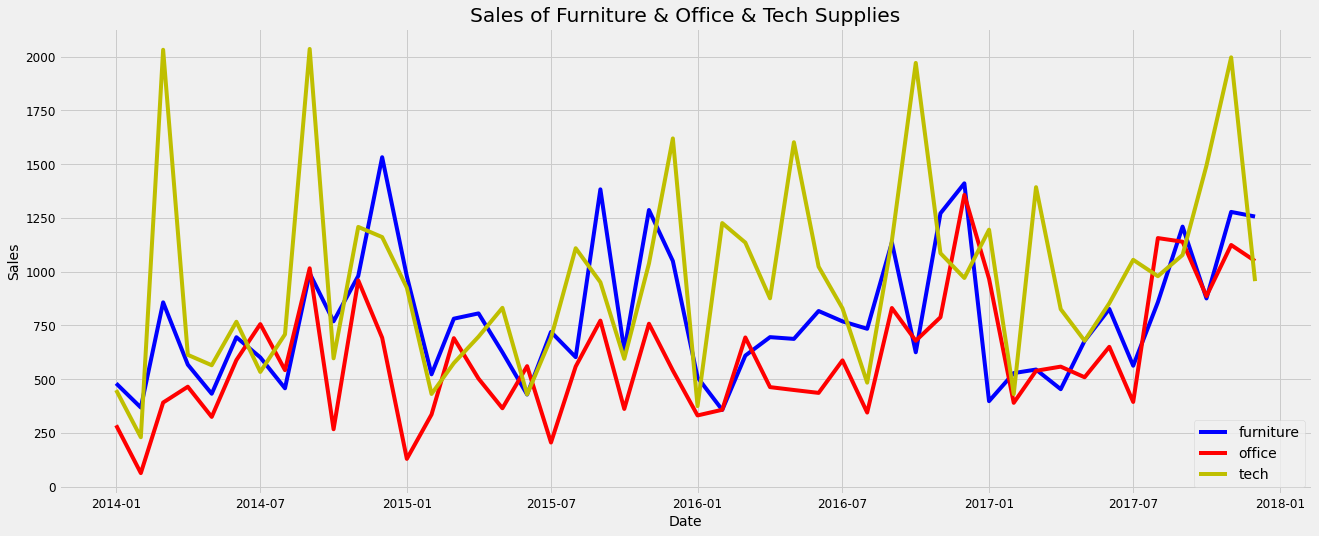

In [315]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office')
plt.plot(store['Order Date'], store['tech_sales'], 'y-', label = 'tech')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture & Office & Tech Supplies')
plt.legend();

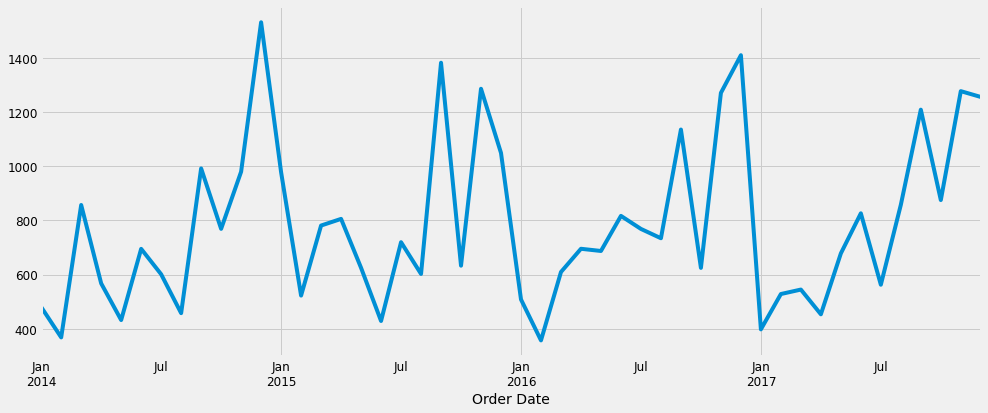

In [33]:
y.plot(figsize=(15, 6))
plt.show()

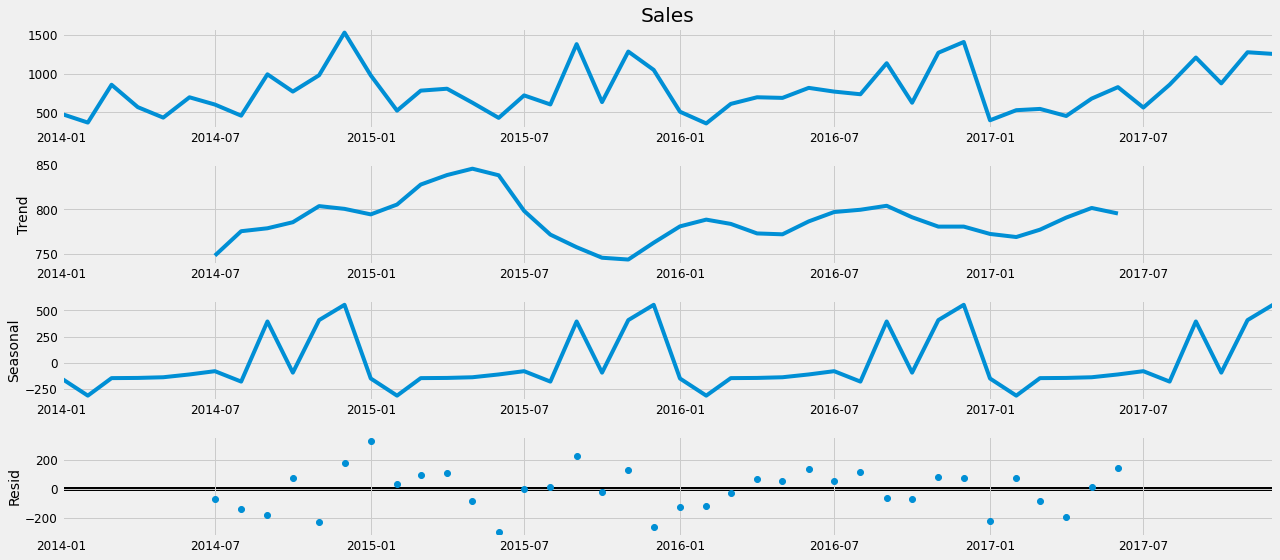

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

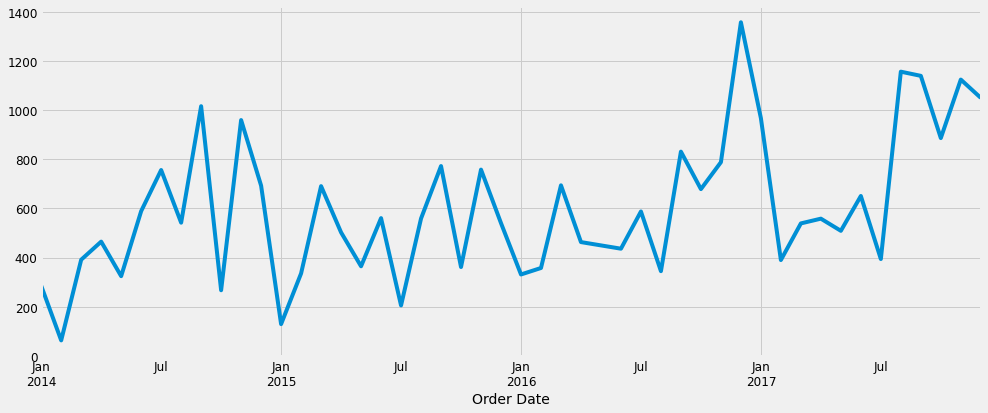

In [35]:
x.plot(figsize=(15, 6))
plt.show()

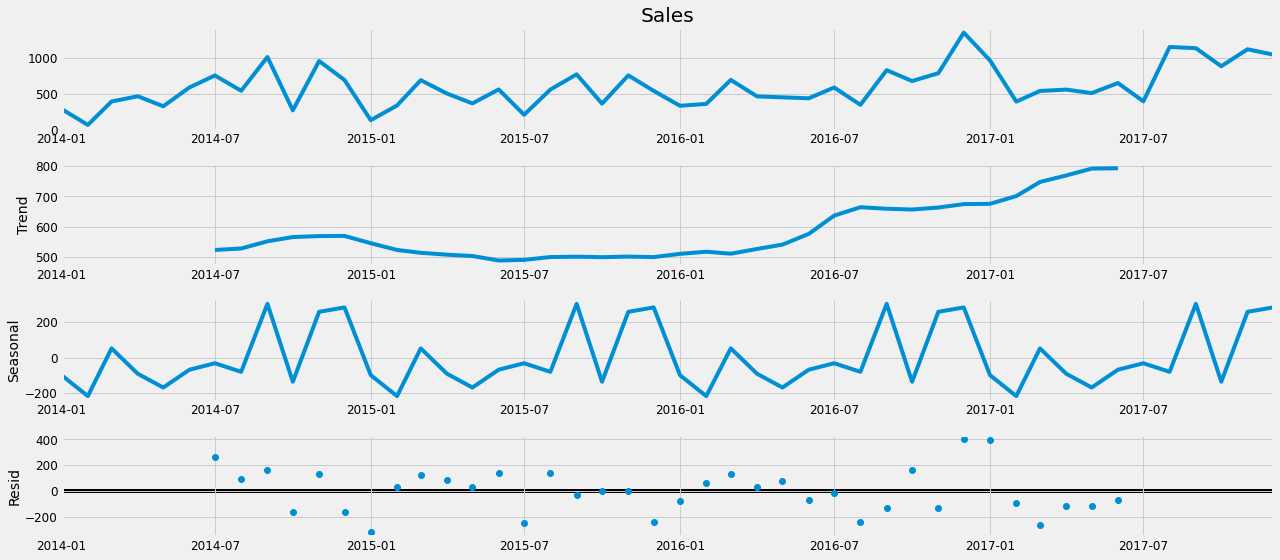

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
plt.show()

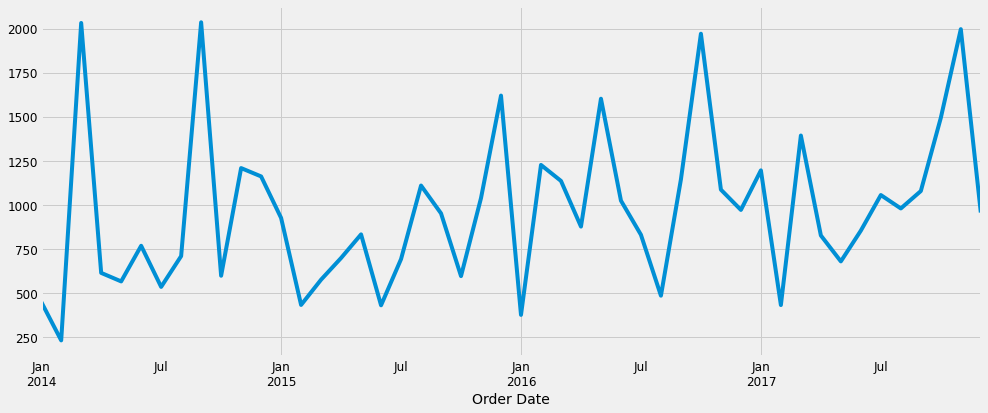

In [38]:
z.plot(figsize=(15, 6))
plt.show()

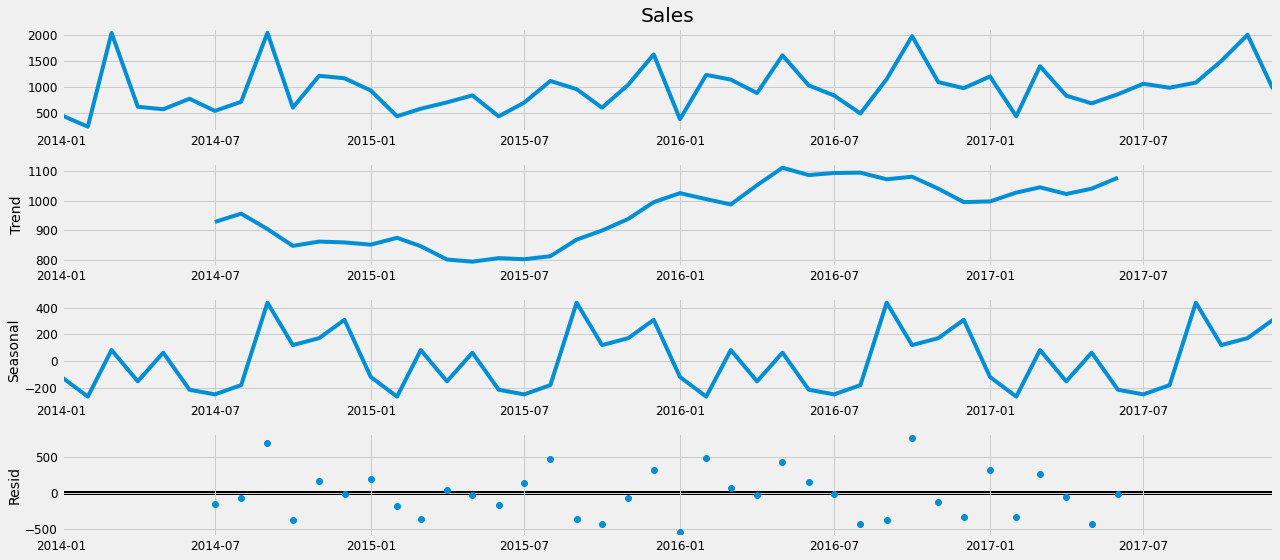

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(z, model='additive')
fig = decomposition.plot()
plt.show()

### Time Series with ARIMA

In [316]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [317]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [318]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.814      -0.186
ar.S.L12      -0.0036      0.424     -0.008      0.993      -0.834       0.827
ma.S.L12      -0.3011      0.501     -0.601      0.548      -1.283       0.681
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


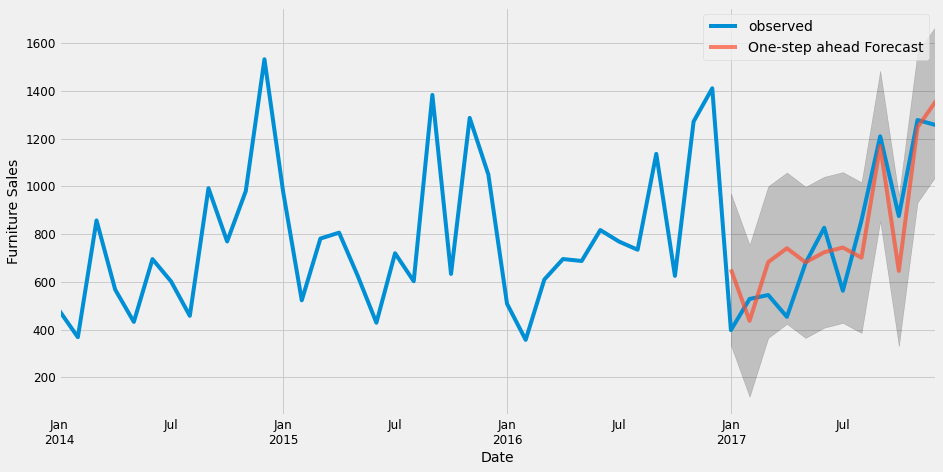

In [319]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [186]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:849.2964734613763
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1457.1281134497767
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:542.5524077991603
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:364.8227393249941
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:556.403053968139
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:536.1242565877667
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:379.31311116746053
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:365.93920356267313
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:800.9546615001085
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2890.037586888476
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:528.8097917495896
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:349.6147790742519
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:558.3100438697015
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:520.4226827208993
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:378.6443983832892
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:350.75218248812394
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:761.9496656386242
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1458.944885727407
ARIMA(0

In [187]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.814      -0.186
ar.S.L12      -0.0036      0.424     -0.008      0.993      -0.834       0.827
ma.S.L12      -0.3011      0.501     -0.601      0.548      -1.283       0.681
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


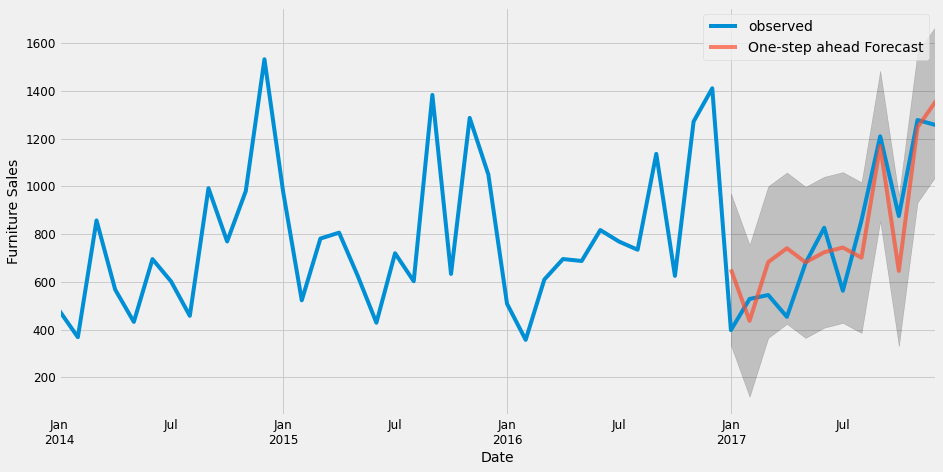

In [188]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [189]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25708.54


In [190]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 160.34


In [43]:
mod = sm.tsa.statespace.SARIMAX(x,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2479      0.328      0.755      0.450      -0.395       0.891
ma.L1         -0.9389      0.462     -2.030      0.042      -1.845      -0.032
ar.S.L12      -0.6135      0.348     -1.762      0.078      -1.296       0.069
sigma2      7.421e+04   2.68e+04      2.768      0.006    2.17e+04    1.27e+05


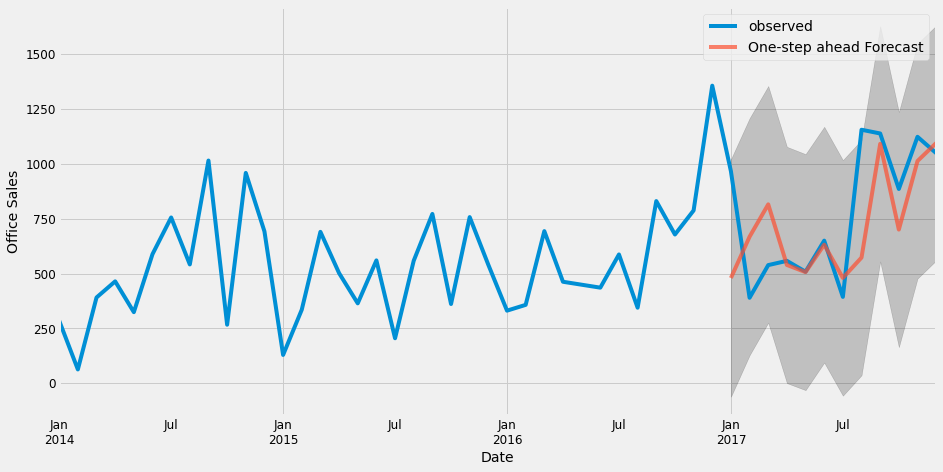

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = x['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Sales')
plt.legend()
plt.show()

In [48]:
x_forecasted = pred.predicted_mean
x_truth = x['2017-01-01':]
mse = ((x_forecasted - x_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 65844.6


In [49]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 256.6


In [55]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

NameError: name 'furniture_forecast' is not defined

In [50]:
mod = sm.tsa.statespace.SARIMAX(z,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


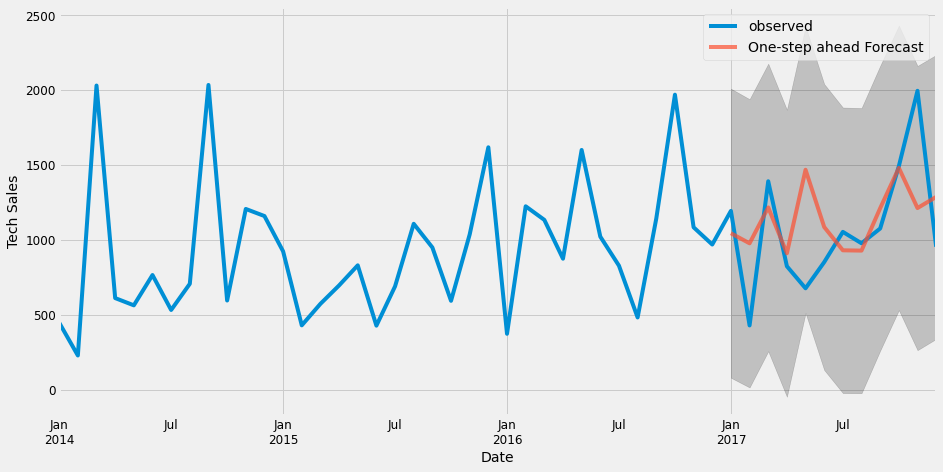

In [52]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = z['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Tech Sales')
plt.legend()
plt.show()

In [53]:
z_forecasted = pred.predicted_mean
z_truth = x['2017-01-01':]
mse = ((z_forecasted - z_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 235051.58


In [54]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 484.82


In [35]:
furniture['Time'] = np.arange(len(furniture.index))
furniture.head()

,Sales,Time
Order Date,,
2014-01-06,2573.820,0
2014-01-07,76.728,1
2014-01-10,51.940,2
2014-01-11,9.940,3
2014-01-13,879.939,4


In [38]:
from sklearn.linear_model import LinearRegression

# Training data
X = furniture.loc[:, ['Time']]  # features
y = furniture.loc[:, 'Sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [40]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

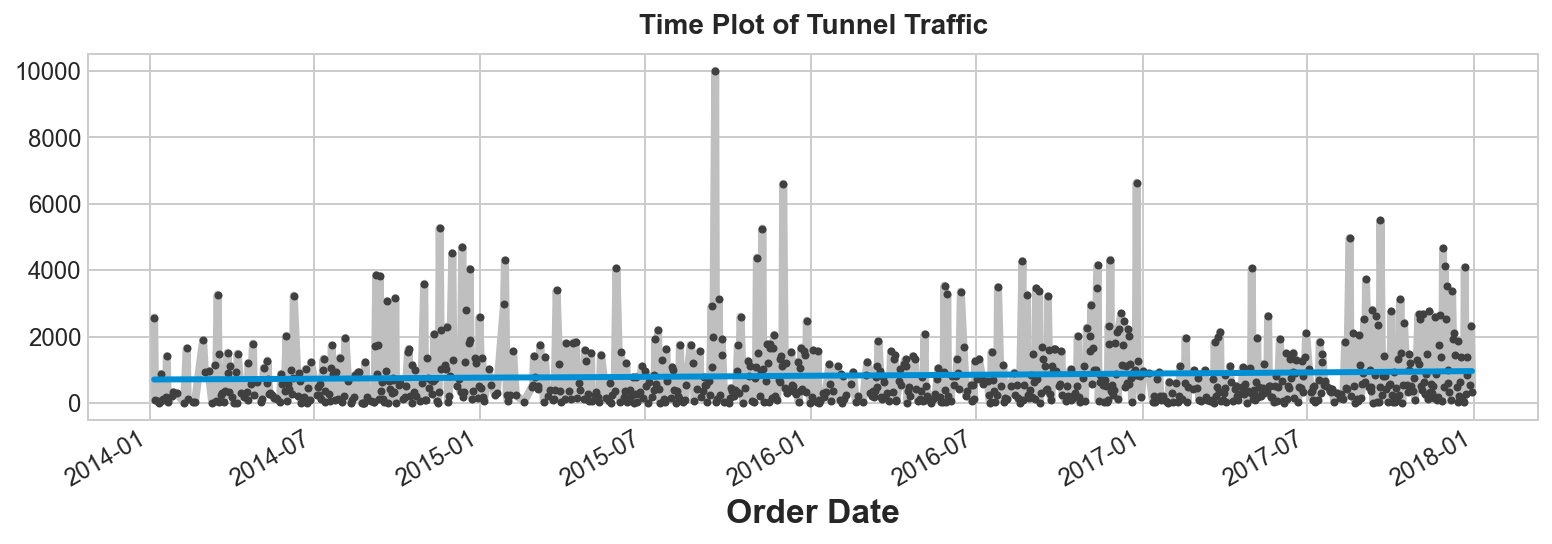

In [41]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [45]:
furniture['Lag_1'] = furniture['Sales'].shift(1)
furniture.head()

,Sales,Time,Lag_1
Order Date,,,
2014-01-06,2573.820,0,NaN
2014-01-07,76.728,1,2573.820
2014-01-10,51.940,2,76.728
2014-01-11,9.940,3,51.940
2014-01-13,879.939,4,9.940


In [47]:
from sklearn.linear_model import LinearRegression

X = furniture.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = furniture.loc[:, 'Sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

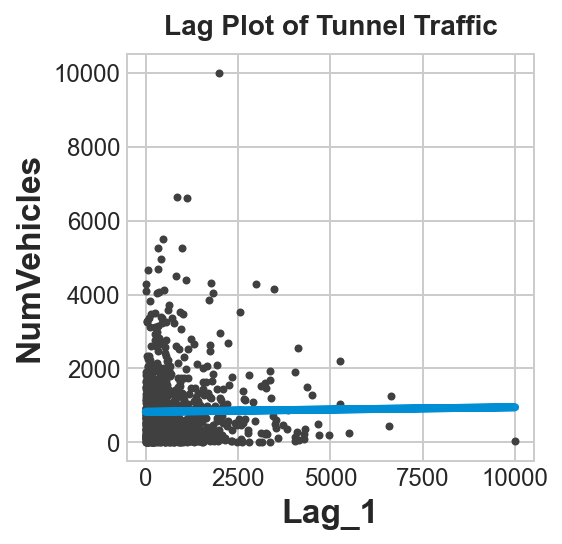

In [48]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

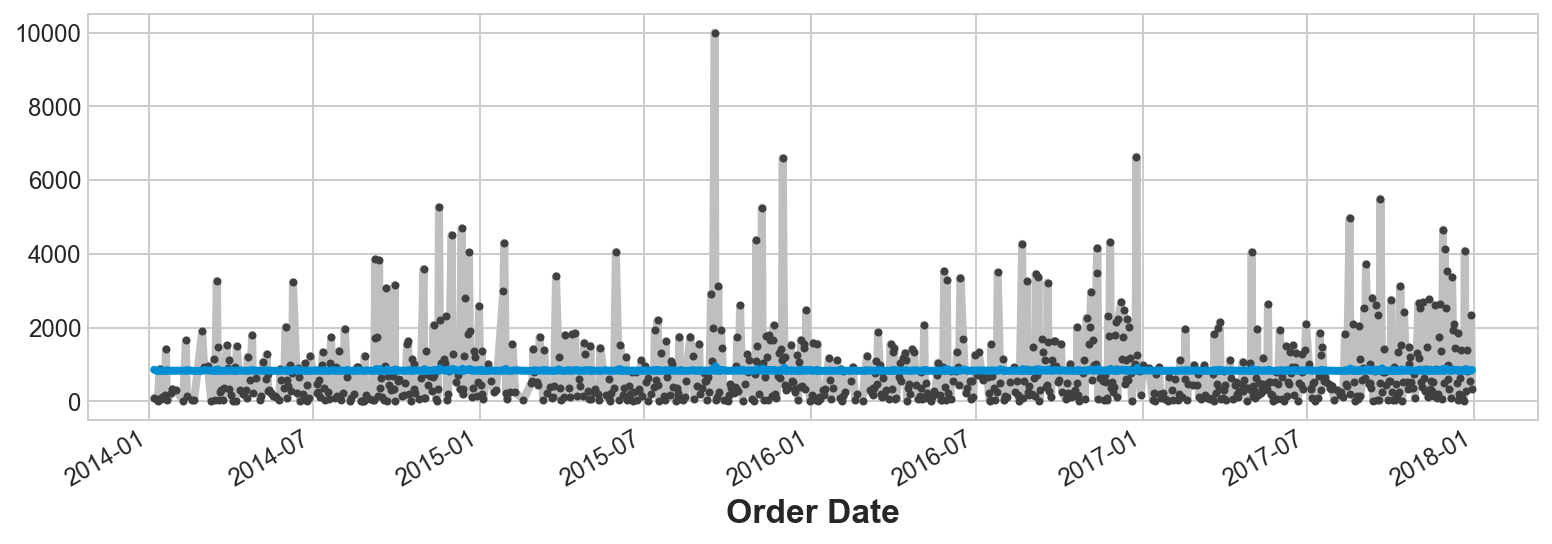

In [49]:
ax = y.plot(**plot_params)
ax = y_pred.plot()